In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

In [5]:
temp_df     =pd.read_csv("CA avg temps 2000-2020.csv")
precip_df   =pd.read_csv("CA total precip 2000-2020.csv")
beefprod_df = pd.read_csv( "CA beef production 2000-2020.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'Output/trend in temperature.png'

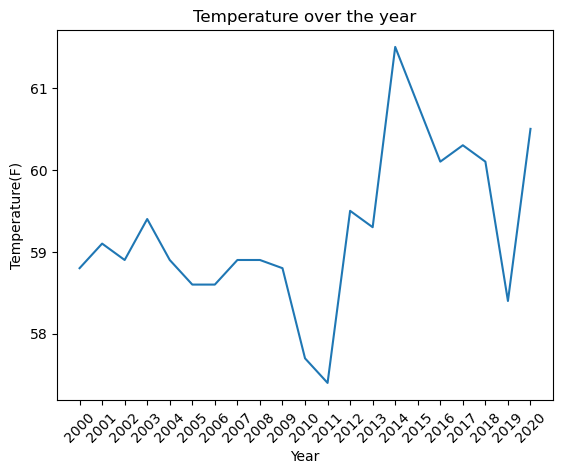

In [8]:
temp_df["Year"]=temp_df["Year"].astype(str)

#trend in temperature
x_values=temp_df["Year"]
y_values=temp_df["Avg Temp"]
plt.plot(x_values,y_values)
plt.xticks(rotation=45)
plt.title("Temperature over the year")
plt.xlabel("Year")
plt.ylabel("Temperature(F)")
plt.savefig("Output/trend in temperature")
plt.show()

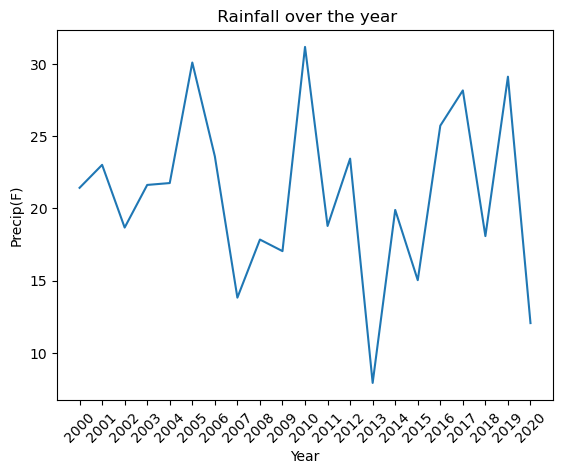

In [34]:
precip_df["Year"]=precip_df["Year"].astype(str)

#trend in rainfall
x_values=precip_df["Year"]
y_values=precip_df["Total Precip"]
plt.plot(x_values,y_values)
plt.xticks(rotation=45)
plt.title(" Rainfall over the year")
plt.xlabel("Year")
plt.ylabel("Precip(F)")
plt.savefig("Output/trend in rainfall")
plt.show()

In [14]:
#clean beef dataframe

beefprod_df["beef prod(Billion LB)"]=beefprod_df["beef production in LB"].str.replace(",","").astype(float)/1000000000
beefprod_df["beef prod(Billion LB)"]=round(beefprod_df["beef prod(Billion LB)"],2)
beefprod_df["Year"]=beefprod_df["Year"].astype(str)

In [4]:
beefprod_df

,Year,beef production in LB,beef prod(Billion LB)
0,2000,"1,923,165,000",1.92
1,2001,"1,992,529,000",1.99
2,2002,"1,832,884,000",1.83
3,2003,"1,987,446,000",1.99
4,2004,"1,982,875,000",1.98
5,2005,"1,926,565,000",1.93
6,2006,"1,994,084,000",1.99
7,2007,"1,976,564,000",1.98
8,2008,"1,995,264,000",2.00
9,2009,"1,896,641,000",1.90


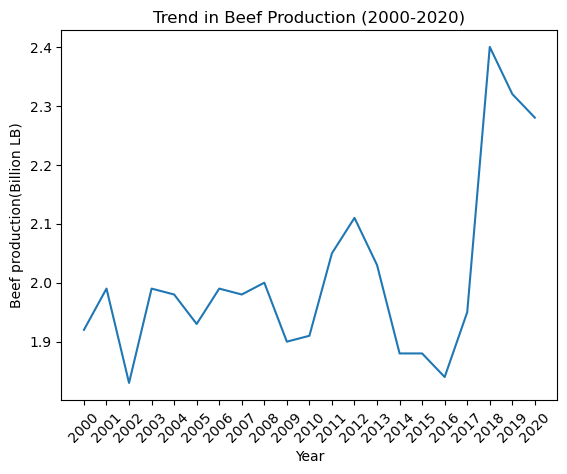

In [15]:
#trend in beef production 
x_values=beefprod_df["Year"]
y_values=beefprod_df["beef prod(Billion LB)"]
plt.plot(x_values,y_values)
plt.xticks(rotation=45)
plt.title("Trend in Beef Production (2000-2020)")
plt.xlabel("Year")
plt.ylabel("Beef production(Billion LB)")
plt.savefig("Output/trend in beef production")
plt.show()

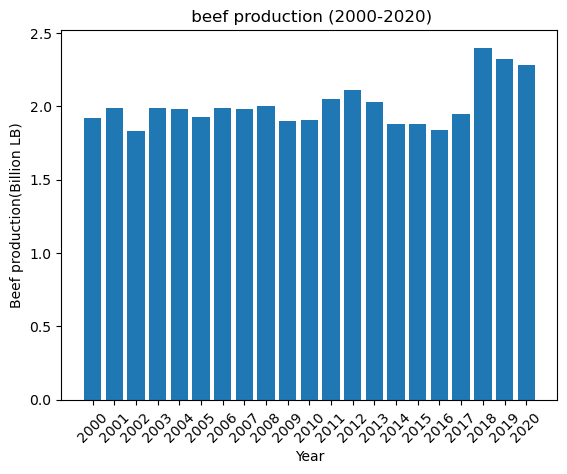

In [25]:
#beef production by  year
x_values=beefprod_df["Year"]
y_values=beefprod_df["beef prod(Billion LB)"]
plt.bar(x_values,y_values)
plt.xticks(rotation=45)
plt.title(" beef production (2000-2020)")
plt.xlabel("Year")
plt.ylabel("Beef production(Billion LB)")
plt.savefig("Output/Beef Production by year")
plt.show()

The r value is :-0.12


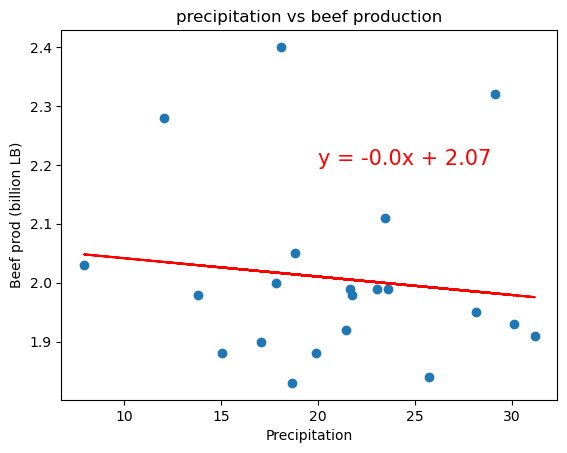

In [23]:
#Scatter plot
x_values = precip_df ["Total Precip"]
y_values=beefprod_df["beef prod(Billion LB)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,2.2),fontsize=15,color="red")
plt.xlabel("Precipitation")
plt.ylabel("Beef prod (billion LB)")
plt.title("precipitation vs beef production")
print(f"The r value is :{round(rvalue,2)}")
plt.show()

In [43]:
def standard(arr): # Function converts data into standard units
    stand = (arr - np.mean(arr))/np.std(arr)
    return stand

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

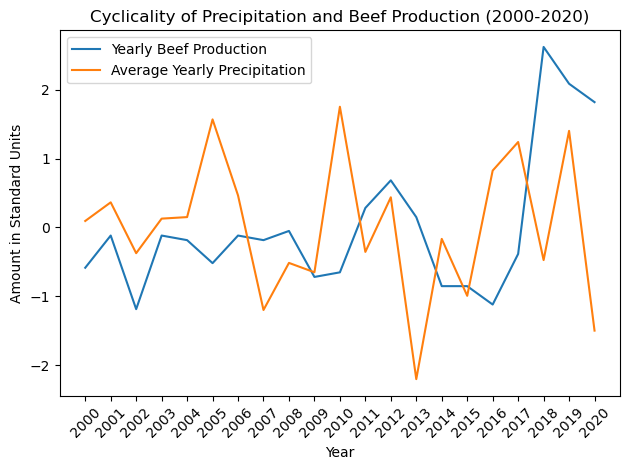

In [45]:
plt.plot(np.array(range(2000,2021)).astype(str), standard(beefprod_df["beef prod(Billion LB)"]), label = "Yearly Beef Production")
plt.plot(np.array(range(2000,2021)).astype(str), standard(precip_df['Total Precip']), label = "Average Yearly Precipitation")
plt.title('Cyclicality of Precipitation and Beef Production (2000-2020)')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Amount in Standard Units')
plt.legend()
plt.show()



In [21]:
def standard(arr): # Function converts data into standard units
    stand = (arr - np.mean(arr))/np.std(arr)
    return stand



### Conclusion 

##### While comparing AVG annual Precipitation with AVG annual beef production, a regression line was not a suitable method for analysing the relationship between precipitation and beef production. This is because a scatterplot of twenty data points for average values does not provide enough meaningful information about the impact that fluctuating precipitation amounts have on production.

##### Therefore the chosen approach is to simultaneously plot production and precipitation amounts to understand the relationship between the two. Since beef production is reported in billions of pounds and annual precipitation is reported in inches, it is necessary to convert these values into standard units to avoid large disparities in the visualization of the data. The figure provides production and precipitation amounts in standard units.

##### From our analysis and the corresponding plot above, it is shown that there is a significant relationship between precipitation amounts and beef yeild. We see that when precipitation decreases, the beef yeild is likely to decline and similarly when precipitation increases, so does beef production. It is also important to note that when precipitation increases or decreases year by year, the repsonse in beef production is slightly delayed. Nonetheless, the plot above shows that there is a noteworthy relationship between precipitation and beef production. 